# Titanic: Machine Learning from Disaster

by Semin Kim. Last Update: 2017/01/07.

## Variable description

* survival: Survival (0 = No; 1 = Yes)
* pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name: Name
* sex: Sex
* age: Age
* sibsp: Number of Siblings/Spouses Aboard
* parch: Number of Parents/Children Aboard
* ticket: Ticket Number
* fare: Passenger Fare
* cabin: Cabin
* embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Goal
Use 891 train data with survival data, predict survivals for 421 test data. 

# 1. Summary of exploratory analysis

We summarize information from the below analysis.

Sex
- Females have significantly higher survival rate. 

PClass
- Lower socio-economic status (PClass=3) has significantly lower survival rate. 

Name
- We use the title from Name. This variable will depend on age, sex, and the number of families. 
- Miss and Mrs have a significantly higher survival rate, while Mr has a lower survival rate. 

SibSp, Parch, familySize
- Having 1-2 siblings, or 1-2 Parch seems to increase the chance of survival. 
- Regarding a total number of family size (including the person), being the single family has a disadvantage while having the 2-4 size of the family has an advantage. 

Fare
- We see that general trend that the survival rate is high in Fares > 20. (We need a statistical testing to check more precisely) 

Age
- 20% of data are missing.
- The age of 0-18 has a higher survival rate, while the age of 18-30 and 60+ have a lower survival rate. 
- 'Missing age' indicate more toward 'not survived', even though the evidence is not too strong. (need a statistical test for exact conclusion, but we keep using 'missing' as a feature)

Cabin
- 77% of data are missing. 
- 'Having information' increases the chance of survival. In other words, missing information is more likely to be caused by missing people from the accident. 

*References*
* Exploring the Titanic Dataset by Megan L. Risdal

# 2. Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

## Basic statistics

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

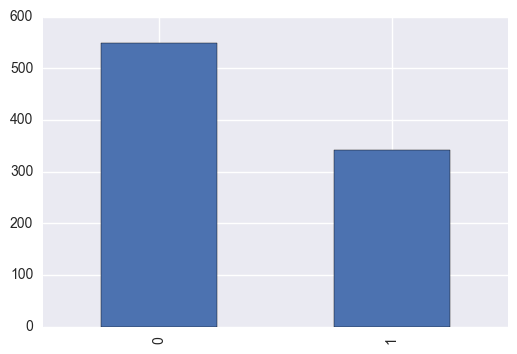

In [6]:
survived_cnt = df.Survived.value_counts()
survived_cnt.plot(kind='bar')

In [8]:
print('Overall Non-Survival Rate = %.1f%%' %(survived_cnt[0]/(survived_cnt[0]+survived_cnt[1])*100))

Overall Non-Survival Rate = 61.6%


## Sex

- Females have significantly higher survival rate. 

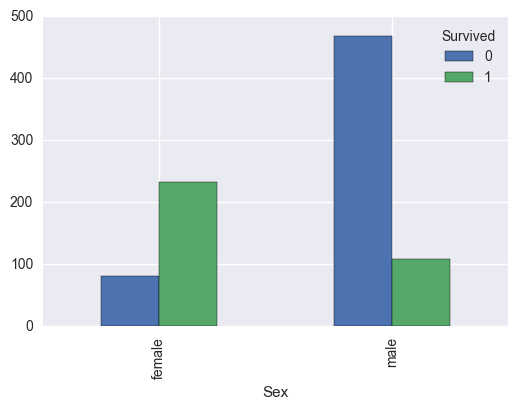

In [9]:
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar')

## PClass

- Lower socio-economic status (PClass=3) has significantly lower survival rate. 

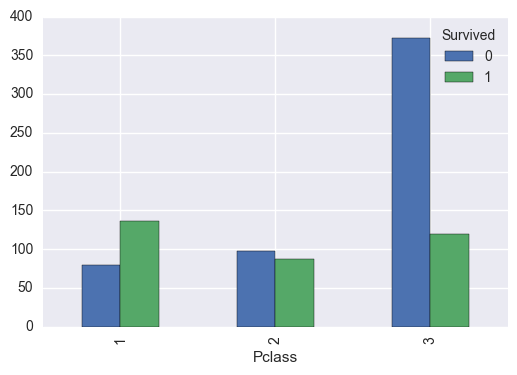

In [10]:
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar')

## Name/Title

- We use the title from Name. This variable will depend on age, sex, and the number of families. 
- Miss and Mrs have a significantly higher survival rate, while Mr has a lower survival rate. 

In [11]:
# add title
def getTitle(s):
    first,last = s.split(',')
    
    last = last.strip()
    title = ''
    if last.find('.') != -1:
        title = last.split('.')[0]
        
    if title not in ['Mr', 'Mrs', 'Miss', 'Master']:
        return 'Else'
    return title

df['title'] = df.Name.map(getTitle);

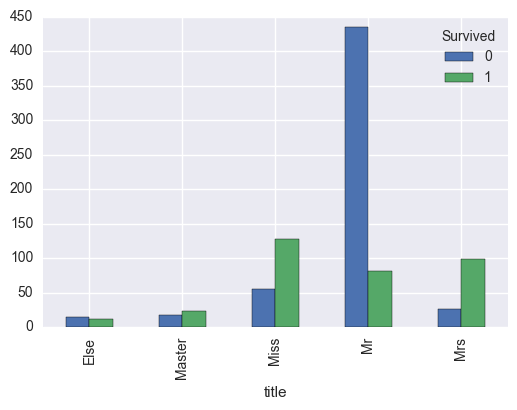

In [12]:
df.groupby(['title', 'Survived']).size().unstack().plot(kind='bar')

## Family Size 

- Having 1-2 siblings, or 1-2 Parch seems to increase the chance of survival. 
- Regarding a total number of family size (including the person), being the single family has a disadvantage while having the 2-4 size of the family has an advantage. 

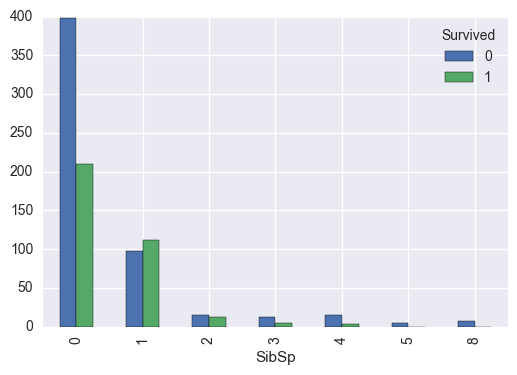

In [13]:
df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar')

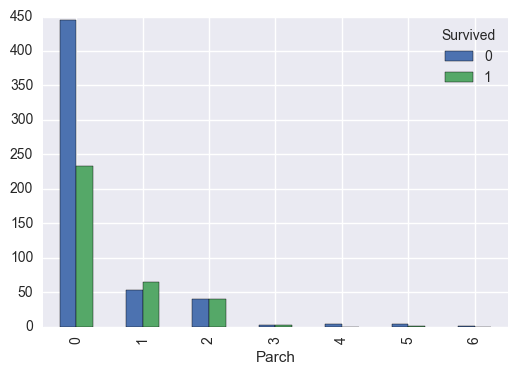

In [14]:
df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar')

In [15]:
# add family size
df['familySize'] = df.SibSp + df.Parch
df['familySize'] = df['familySize'].map(lambda x: x+1)

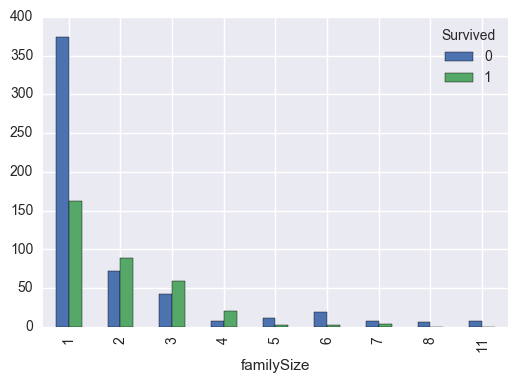

In [16]:
df.groupby(['familySize', 'Survived']).size().unstack().plot(kind='bar')

## Fare

- We see that general trend that the survival rate is high in Fares > 20. (We need a statistical testing to check more precisely) 

C:\Users\smkim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


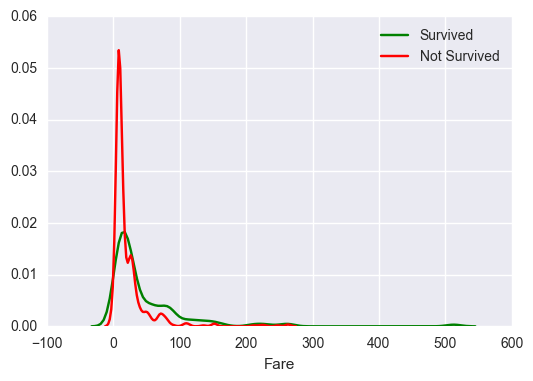

In [17]:
fares = df.Fare
mask_survived = (df.Survived == 1)
sns.distplot(fares[mask_survived], hist=False, kde=True, label='Survived', color='green')
sns.distplot(fares[~mask_survived], hist=False, kde=True, label='Not Survived', color='red')

C:\Users\smkim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


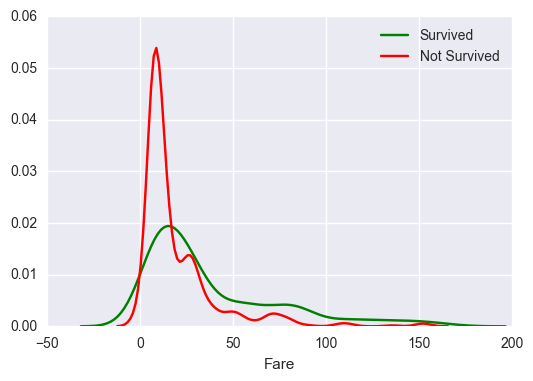

In [18]:
fares = df.Fare[df.Fare < 200]
mask_survived = (df.Survived == 1)
sns.distplot(fares[mask_survived], hist=False, kde=True, label='Survived', color='green')
sns.distplot(fares[~mask_survived], hist=False, kde=True, label='Not Survived', color='red')

## Age

- 20% of data are missing.
- The age of 0-18 has a higher survival rate, while the age of 18-30 and 60+ have a lower survival rate. 
- 'Missing age' indicate more toward 'not survived', even though the evidence is not too strong. (need a statistical test for exact conclusion, but we keep using 'missing' as a feature)

C:\Users\smkim\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


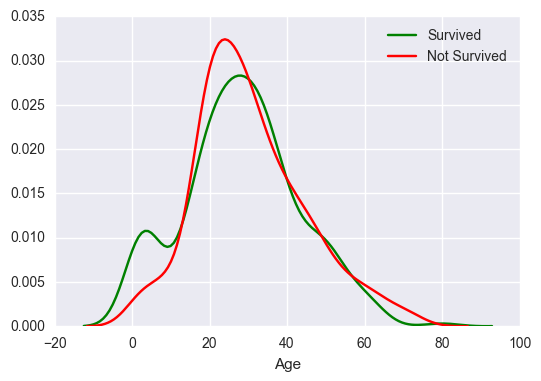

In [19]:
ages = df.Age[df.Age.notnull()]
mask_survived = (df.Survived == 1)
sns.distplot(ages[mask_survived], hist=False, kde=True, label='Survived', color='green')
sns.distplot(ages[~mask_survived], hist=False, kde=True, label='Not Survived', color='red')

In [20]:
df.Age.fillna(1000, inplace=True)
df['ageCat'] = pd.cut(df['Age'], bins=[0,18,30,60, 100, 2000])

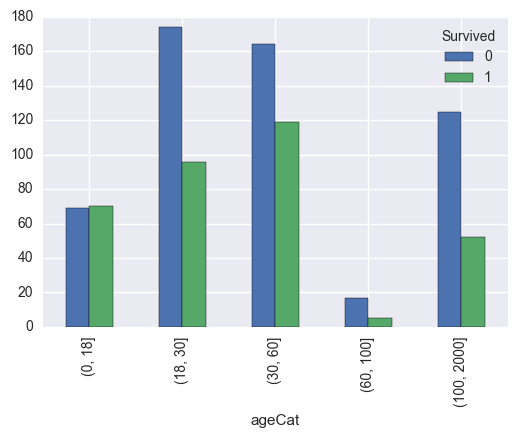

In [21]:
df.groupby(['ageCat', 'Survived']).size().unstack().plot(kind='bar')

# Cabin

- 77% of data are missing. 
- 'Having information' increases the chance of survival. In other words, missing information is more likely to be caused by missing people from the accident. 

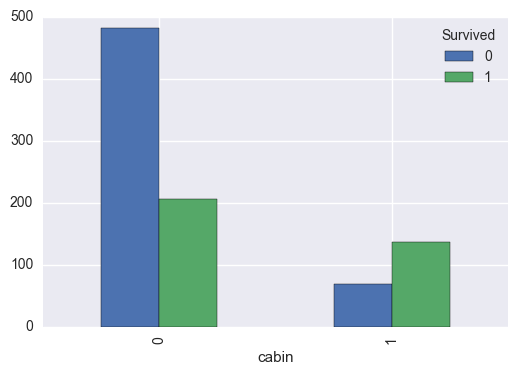

In [23]:
df['cabin'] = 0
df.loc[df.Cabin.notnull(), 'cabin'] = 1
df.groupby(['cabin', 'Survived']).size().unstack().plot(kind='bar')